## Part B: Analysis

**Note**: If it complains that it can't find the file below, you need to go to Google Drive > Shared with me > **Right** click on "UWaterloo Stats Course Group 2 Winter 2021" > Add shortcut to Drive

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from sklearn import preprocessing


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/UWaterloo Stats Course Group 2 Winter 2021/merged_and_cleaned_dataset_from_partA.csv")

df.head(10)

Mounted at /content/drive


,ORIGIN_CITY,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_DATETIME,TEMPERATURE,HUMIDITY,PRESSURE,WEATHER_DESCRIPTION,WIND_SPEED,WIND_DIRECTION
0,Los Angeles,-8.0,12.0,-9.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 00:10:00,276.988500,39.0,1030.0,moderate rain,2.0,10.0
1,Portland,-5.0,9.0,-12.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 00:50:00,270.460000,60.0,1045.0,sky is clear,2.0,68.0
2,Las Vegas,25.0,11.0,6.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 00:55:00,274.685000,49.0,1028.0,light snow,3.0,242.0
3,Seattle,-8.0,30.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:00:00,272.576667,95.0,1046.0,sky is clear,2.0,20.0
4,Las Vegas,-1.0,13.0,-1.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:03:00,274.685000,49.0,1028.0,light snow,3.0,242.0
5,Las Vegas,-3.0,11.0,-23.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:05:00,274.685000,49.0,1028.0,light snow,3.0,242.0
6,Los Angeles,-2.0,14.0,-12.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:05:00,277.518333,39.0,1030.0,moderate rain,2.0,1.0
7,Phoenix,-1.0,11.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:59:00,276.711667,74.0,1028.0,light rain,1.0,198.0
8,Chicago,-1.0,12.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 05:00:00,267.265667,100.0,1036.0,sky is clear,10.0,254.0
9,Boston,-4.0,16.0,-10.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 05:10:00,267.982333,100.0,1033.0,few clouds,5.0,240.0


In [ ]:
# Dataset size
df.count()

ORIGIN_CITY                     1273062
DEPARTURE_DELAY                 1273062
TAXI_OUT                        1273062
ARRIVAL_DELAY                   1273062
DIVERTED                        1273062
CANCELLED                       1273062
AIR_SYSTEM_DELAY                1273062
SECURITY_DELAY                  1273062
AIRLINE_DELAY                   1273062
LATE_AIRCRAFT_DELAY             1273062
WEATHER_DELAY                   1273062
SCHEDULED_DEPARTURE_DATETIME    1273062
TEMPERATURE                     1273062
HUMIDITY                        1273062
PRESSURE                        1273062
WEATHER_DESCRIPTION             1273062
WIND_SPEED                      1273062
WIND_DIRECTION                  1273062
dtype: int64

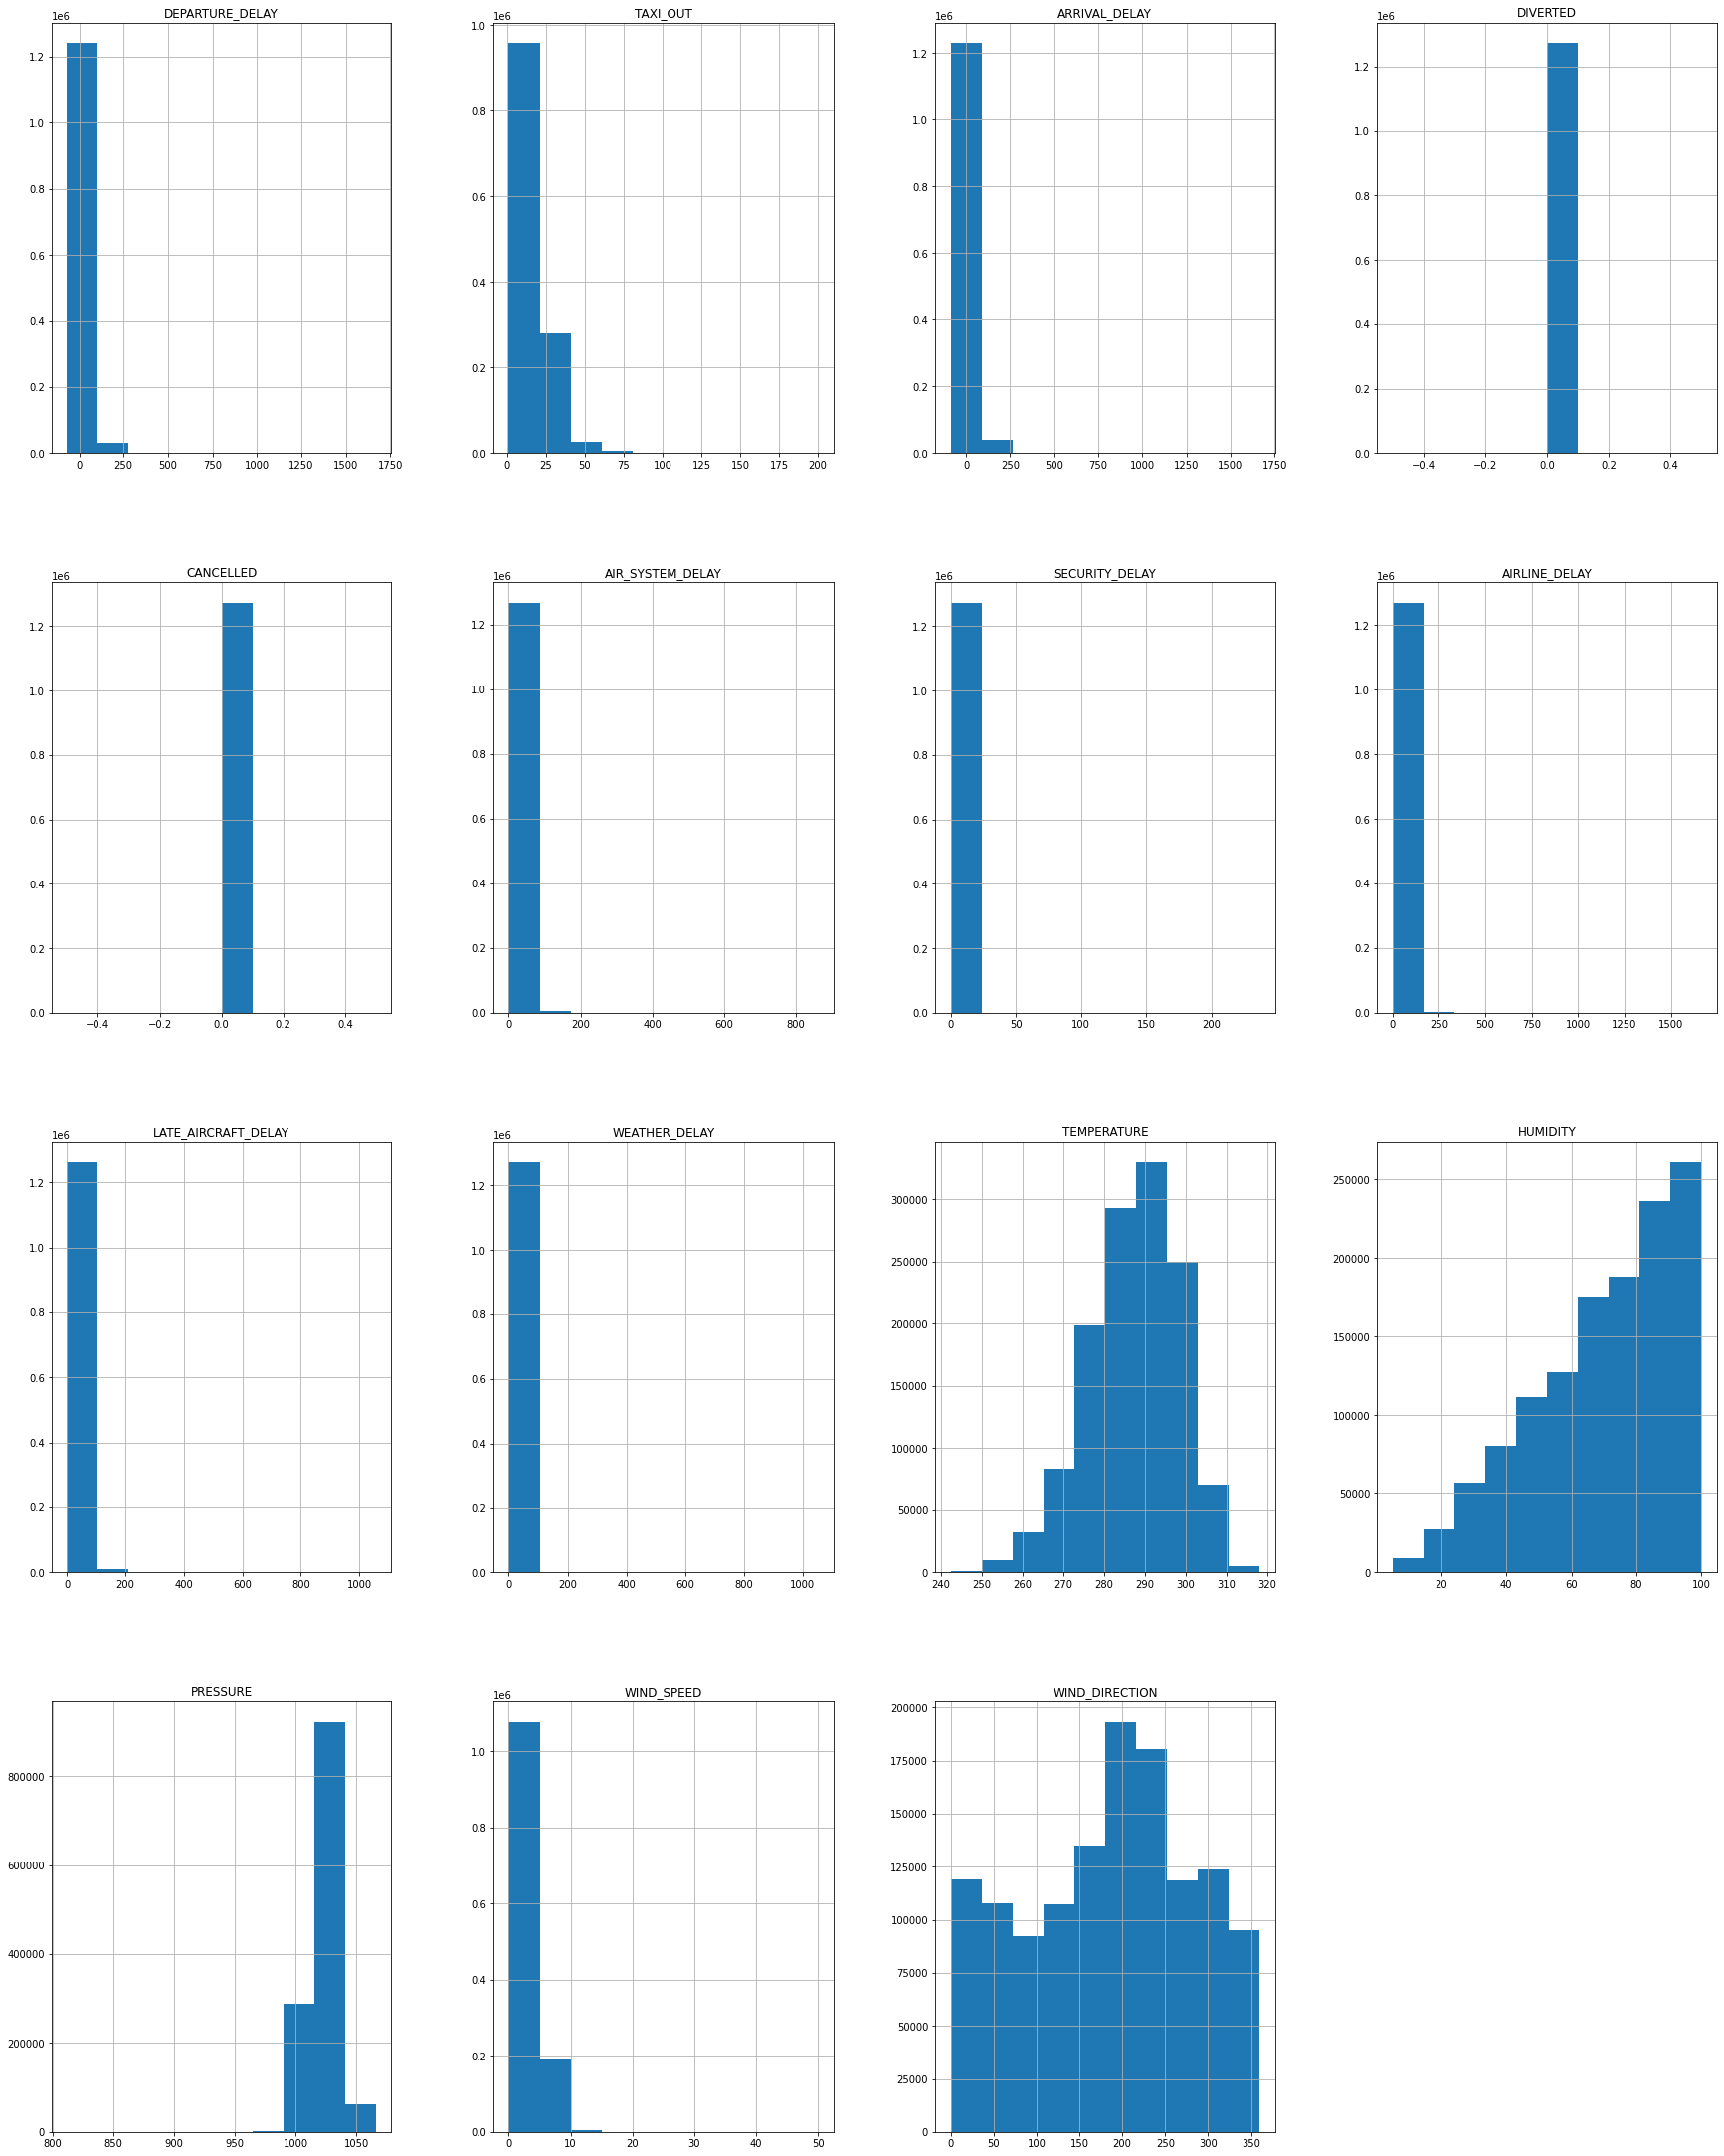

In [ ]:
## Histograms of all features in the dataset

df.hist(figsize=(30,39))
plt.show()

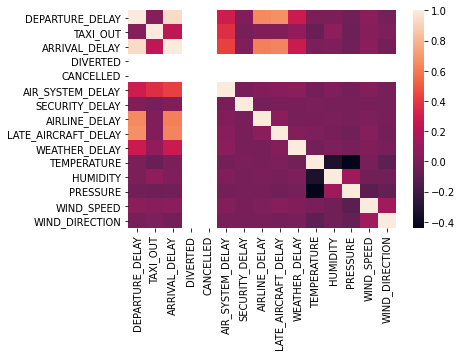

In [ ]:
# A correlation heatmap 
corr = df.corr(method='pearson')
sb.heatmap(corr)

In [ ]:
corr

,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TEMPERATURE,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION
DEPARTURE_DELAY,1.000000,0.049739,0.938682,NaN,NaN,0.286477,0.028013,0.649352,0.666789,0.275064,0.014518,0.015153,-0.019536,0.060116,-0.004988
TAXI_OUT,0.049739,1.000000,0.237269,NaN,NaN,0.368928,0.004398,0.030994,0.032056,0.083854,-0.050217,0.073362,-0.036571,0.044279,0.021141
ARRIVAL_DELAY,0.938682,0.237269,1.000000,NaN,NaN,0.422843,0.028006,0.616809,0.633263,0.280283,0.013349,0.024070,-0.017796,0.060067,-0.011316
DIVERTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANCELLED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR_SYSTEM_DELAY,0.286477,0.368928,0.422843,NaN,NaN,1.000000,0.003076,0.030464,0.052298,0.055467,-0.012054,0.026005,-0.009027,0.034922,-0.002467
SECURITY_DELAY,0.028013,0.004398,0.028006,NaN,NaN,0.003076,1.000000,-0.002223,0.003191,-0.000303,0.004923,-0.003353,-0.003785,0.000106,-0.001339
AIRLINE_DELAY,0.649352,0.030994,0.616809,NaN,NaN,0.030464,-0.002223,1.000000,0.065187,-0.004598,0.000900,0.010182,-0.002902,0.018690,-0.000266
LATE_AIRCRAFT_DELAY,0.666789,0.032056,0.633263,NaN,NaN,0.052298,0.003191,0.065187,1.000000,0.042799,0.020472,0.004342,-0.023154,0.044924,-0.008261
WEATHER_DELAY,0.275064,0.083854,0.280283,NaN,NaN,0.055467,-0.000303,-0.004598,0.042799,1.000000,-0.012138,0.021149,-0.006385,0.030488,-0.000328


In [ ]:
# Categorical values that need to be transformed to numerical values
df['WEATHER_DESCRIPTION'].unique()

array(['moderate rain', 'sky is clear', 'light snow', 'light rain',
       'few clouds', 'scattered clouds', 'overcast clouds',
       'broken clouds', 'heavy intensity rain', 'snow', 'heavy snow',
       'mist', 'haze', 'fog', 'very heavy rain',
       'light intensity drizzle', 'proximity thunderstorm',
       'thunderstorm with light rain', 'thunderstorm',
       'proximity shower rain', 'light intensity shower rain', 'drizzle',
       'thunderstorm with rain', 'thunderstorm with heavy rain',
       'proximity thunderstorm with rain', 'shower rain', 'smoke', 'dust',
       'squalls', 'proximity sand/dust whirls',
       'proximity thunderstorm with drizzle',
       'thunderstorm with light drizzle', 'heavy intensity drizzle',
       'light shower snow', 'freezing rain'], dtype=object)

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'thunderstorm', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'thunderstorm'

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'heavy rain|heavy intensity rain|heavy intensity drizzle|freezing rain', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'heavy rain'

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'light rain|moderate rain|drizzle|light intensity shower rain', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'light rain'

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'snow', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'snow'

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'clear', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'clear'

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'cloud', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'cloudy'

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'mist|haze|fog|dust|smoke|sand/dust|squalls', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'unclear'

In [ ]:
df['WEATHER_DESCRIPTION'].unique()

array(['light rain', 'clear', 'snow', 'cloudy', 'heavy rain', 'unclear',
       'thunderstorm', 'proximity shower rain', 'shower rain'],
      dtype=object)

In [ ]:
df.loc[df['WEATHER_DESCRIPTION'].str.contains(r'shower rain', case = False, na = False), 'WEATHER_DESCRIPTION'] = 'heavy rain'

In [ ]:
df['WEATHER_DESCRIPTION'].unique()

array(['light rain', 'clear', 'snow', 'cloudy', 'heavy rain', 'unclear',
       'thunderstorm'], dtype=object)

In [ ]:
weather_dummies = pd.get_dummies(df['WEATHER_DESCRIPTION'])

In [ ]:
df2 = pd.concat([df,weather_dummies], axis=1)

In [ ]:
df2.rename(columns={'light rain':'light_rain','heavy rain':'heavy_rain'}, inplace=True)

In [ ]:
df2

,ORIGIN_CITY,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCHEDULED_DEPARTURE_DATETIME,TEMPERATURE,HUMIDITY,PRESSURE,WEATHER_DESCRIPTION,WIND_SPEED,WIND_DIRECTION,clear,cloudy,heavy_rain,light_rain,snow,thunderstorm,unclear
0,Los Angeles,-8.0,12.0,-9.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 00:10:00,276.988500,39.0,1030.0,light rain,2.0,10.0,0,0,0,1,0,0,0
1,Portland,-5.0,9.0,-12.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 00:50:00,270.460000,60.0,1045.0,clear,2.0,68.0,1,0,0,0,0,0,0
2,Las Vegas,25.0,11.0,6.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 00:55:00,274.685000,49.0,1028.0,snow,3.0,242.0,0,0,0,0,1,0,0
3,Seattle,-8.0,30.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:00:00,272.576667,95.0,1046.0,clear,2.0,20.0,1,0,0,0,0,0,0
4,Las Vegas,-1.0,13.0,-1.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01 01:03:00,274.685000,49.0,1028.0,snow,3.0,242.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273057,Seattle,10.0,12.0,-17.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:05:00,277.720000,55.0,1035.0,clear,2.0,40.0,1,0,0,0,0,0,0
1273058,Las Vegas,-10.0,11.0,-26.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:05:00,279.960000,22.0,1022.0,clear,5.0,30.0,1,0,0,0,0,0,0
1273059,San Francisco,5.0,14.0,-28.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:08:00,283.570000,65.0,1026.0,cloudy,4.0,360.0,0,1,0,0,0,0,0
1273060,San Francisco,-1.0,17.0,-12.0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:09:00,283.570000,65.0,1026.0,cloudy,4.0,360.0,0,1,0,0,0,0,0


In [ ]:
df2.describe()

,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TEMPERATURE,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,clear,cloudy,heavy_rain,light_rain,snow,thunderstorm,unclear
count,1.273062e+06,1.273062e+06,1.273062e+06,1273062.0,1273062.0,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06,1.273062e+06
mean,1.017929e+01,1.756522e+01,5.084093e+00,0.0,0.0,2.596317e+00,1.509510e-02,3.804939e+00,4.375026e+00,5.880342e-01,2.873012e+02,7.004513e+01,1.023680e+03,2.672959e+00,1.836766e+02,3.746235e-01,3.205272e-01,2.137209e-02,1.558871e-01,2.287398e-02,7.756889e-03,9.695914e-02
std,3.603437e+01,9.605645e+00,3.857887e+01,0.0,0.0,1.282184e+01,9.211324e-01,2.095726e+01,2.067820e+01,8.897383e+00,1.104233e+01,2.186802e+01,1.089412e+01,1.880750e+00,9.718398e+01,4.840258e-01,4.666794e-01,1.446214e-01,3.627485e-01,1.495018e-01,8.773098e-02,2.959022e-01
min,-6.800000e+01,1.000000e+00,-8.700000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.423367e+02,5.000000e+00,8.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-4.000000e+00,1.200000e+01,-1.300000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.800263e+02,5.500000e+01,1.016000e+03,1.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-1.000000e+00,1.500000e+01,-4.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.882500e+02,7.400000e+01,1.023000e+03,2.000000e+00,1.930000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.000000e+01,9.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.955220e+02,8.800000e+01,1.031000e+03,4.000000e+00,2.590000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.670000e+03,2.000000e+02,1.665000e+03,0.0,0.0,8.620000e+02,2.370000e+02,1.665000e+03,1.057000e+03,1.052000e+03,3.181100e+02,1.000000e+02,1.066000e+03,5.000000e+01,3.600000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df2.columns

Index(['ORIGIN_CITY', 'DEPARTURE_DELAY', 'TAXI_OUT', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
       'SCHEDULED_DEPARTURE_DATETIME', 'TEMPERATURE', 'HUMIDITY', 'PRESSURE',
       'WEATHER_DESCRIPTION', 'WIND_SPEED', 'WIND_DIRECTION', 'clear',
       'cloudy', 'heavy_rain', 'light_rain', 'snow', 'thunderstorm',
       'unclear'],
      dtype='object')

In [ ]:
#Dropped Coloumns that were not needed
df2.drop(['WEATHER_DESCRIPTION', 'ORIGIN_CITY', 'SCHEDULED_DEPARTURE_DATETIME'], inplace = True, axis=1)  

In [ ]:
#Dropped Coloumns that were not needed
df2.drop(['DIVERTED', 'CANCELLED'], inplace = True, axis=1)  

In [ ]:
#Normalizing the data so that units are removed. MinMaxScalar was used and ranges are set between -1 to 1 because there are negative numbers in the dataset. For assistance, this resource was used https://www.journaldev.com/45109/normalize-data-in-python.
scaler = preprocessing.MinMaxScaler(feature_range= (-1,1))
names = df2.columns
d = scaler.fit_transform(df2)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TEMPERATURE,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,clear,cloudy,heavy_rain,light_rain,snow,thunderstorm,unclear
0,-0.930955,-0.889447,-0.910959,-1.0,-1.0,-1.0,-1.0,-1.0,-0.085382,-0.284211,0.716535,-0.92,-0.944444,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,-0.927503,-0.919598,-0.914384,-1.0,-1.0,-1.0,-1.0,-1.0,-0.257698,0.157895,0.834646,-0.92,-0.622222,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.892980,-0.899497,-0.893836,-1.0,-1.0,-1.0,-1.0,-1.0,-0.146182,-0.073684,0.700787,-0.88,0.344444,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
3,-0.930955,-0.708543,-0.899543,-1.0,-1.0,-1.0,-1.0,-1.0,-0.201830,0.894737,0.842520,-0.92,-0.888889,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.922900,-0.879397,-0.901826,-1.0,-1.0,-1.0,-1.0,-1.0,-0.146182,-0.073684,0.700787,-0.88,0.344444,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [ ]:
#Just doing some mean calculations for the following features to see if there is a differences in means 
scaled_df.groupby(['clear'])['DEPARTURE_DELAY'].median()

clear
-1.0   -0.922900
 1.0   -0.924051
Name: DEPARTURE_DELAY, dtype: float64

In [ ]:
scaled_df.groupby(['clear'])['DEPARTURE_DELAY'].mean()


clear
-1.0   -0.908211
 1.0   -0.913081
Name: DEPARTURE_DELAY, dtype: float64

In [ ]:
scaled_df.groupby(['snow'])['DEPARTURE_DELAY'].median()

snow
-1.0   -0.922900
 1.0   -0.917146
Name: DEPARTURE_DELAY, dtype: float64

In [ ]:
scaled_df.groupby(['snow'])['DEPARTURE_DELAY'].mean()

snow
-1.0   -0.910375
 1.0   -0.895507
Name: DEPARTURE_DELAY, dtype: float64

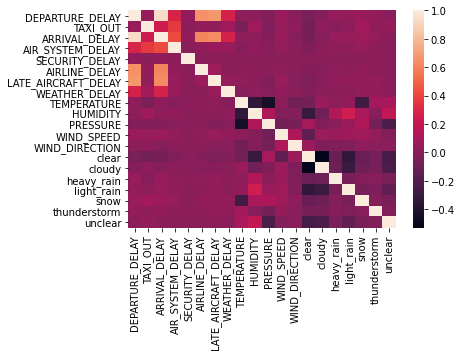

In [ ]:
# a correlation heatmap of the normalized dataset
corr3 = scaled_df.corr(method='pearson')
sb.heatmap(corr3)

In [ ]:
corr3

,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TEMPERATURE,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,clear,cloudy,heavy_rain,light_rain,snow,thunderstorm,unclear
DEPARTURE_DELAY,1.000000,0.049739,0.938682,0.286477,0.028013,0.649352,0.666789,0.275064,0.014518,0.015153,-0.019536,0.060116,-0.004988,-0.056852,-0.011712,0.044720,0.037997,0.053605,0.040284,0.004004
TAXI_OUT,0.049739,1.000000,0.237269,0.368928,0.004398,0.030994,0.032056,0.083854,-0.050217,0.073362,-0.036571,0.044279,0.021141,-0.077370,0.016745,-0.007696,0.014737,0.092161,0.021474,0.032916
ARRIVAL_DELAY,0.938682,0.237269,1.000000,0.422843,0.028006,0.616809,0.633263,0.280283,0.013349,0.024070,-0.017796,0.060067,-0.011316,-0.059782,-0.016413,0.044579,0.045049,0.065446,0.040989,0.001441
AIR_SYSTEM_DELAY,0.286477,0.368928,0.422843,1.000000,0.003076,0.030464,0.052298,0.055467,-0.012054,0.026005,-0.009027,0.034922,-0.002467,-0.037157,0.001406,0.014045,0.019480,0.048281,0.012150,-0.000178
SECURITY_DELAY,0.028013,0.004398,0.028006,0.003076,1.000000,-0.002223,0.003191,-0.000303,0.004923,-0.003353,-0.003785,0.000106,-0.001339,-0.000037,-0.000297,-0.000334,0.000520,-0.000499,0.002216,-0.000349
AIRLINE_DELAY,0.649352,0.030994,0.616809,0.030464,-0.002223,1.000000,0.065187,-0.004598,0.000900,0.010182,-0.002902,0.018690,-0.000266,-0.018060,-0.006182,0.014610,0.012553,0.025742,0.010691,0.000586
LATE_AIRCRAFT_DELAY,0.666789,0.032056,0.633263,0.052298,0.003191,0.065187,1.000000,0.042799,0.020472,0.004342,-0.023154,0.044924,-0.008261,-0.045336,-0.010257,0.038626,0.030466,0.035537,0.035862,0.005521
WEATHER_DELAY,0.275064,0.083854,0.280283,0.055467,-0.000303,-0.004598,0.042799,1.000000,-0.012138,0.021149,-0.006385,0.030488,-0.000328,-0.026346,-0.004553,0.011491,0.011910,0.034223,0.027307,0.004672
TEMPERATURE,0.014518,-0.050217,0.013349,-0.012054,0.004923,0.000900,0.020472,-0.012138,1.000000,-0.328933,-0.439354,0.001291,-0.086278,-0.077153,0.057966,0.015566,0.025014,-0.270478,0.093357,0.105488
HUMIDITY,0.015153,0.073362,0.024070,0.026005,-0.003353,0.010182,0.004342,0.021149,-0.328933,1.000000,0.131607,-0.021489,-0.021393,-0.298612,-0.082956,0.143803,0.246374,0.102702,-0.005596,0.196746


In [ ]:
#this is a makeshift forward stepwise calcuation to find the ideal slope equation of our linear regression analysis. Code was used from this source https://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(scaled_df, response):
    remaining = set(scaled_df.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, scaled_df).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, scaled_df).fit()
    return model

In [ ]:
#Printing the results from the step above Code was used from this source https://planspace.org/20150423-forward_selection_with_statsmodels/
import pandas as pd
model = forward_selected(scaled_df, 'DEPARTURE_DELAY')
print(model.model.formula)
print(model.rsquared_adj)

DEPARTURE_DELAY ~ ARRIVAL_DELAY + TAXI_OUT + AIR_SYSTEM_DELAY + LATE_AIRCRAFT_DELAY + AIRLINE_DELAY + WEATHER_DELAY + SECURITY_DELAY + clear + WIND_SPEED + WIND_DIRECTION + snow + PRESSURE + TEMPERATURE + thunderstorm + unclear + heavy_rain + HUMIDITY + light_rain + 1
0.946232315881069


In [ ]:
#Running the OLS results to see the full result of the model

results2= ols('DEPARTURE_DELAY ~ ARRIVAL_DELAY + TAXI_OUT + AIR_SYSTEM_DELAY + LATE_AIRCRAFT_DELAY + AIRLINE_DELAY + WEATHER_DELAY + SECURITY_DELAY + clear + WIND_SPEED + WIND_DIRECTION + snow + PRESSURE + TEMPERATURE + thunderstorm + unclear + heavy_rain + HUMIDITY + light_rain', data=scaled_df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        DEPARTURE_DELAY   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.245e+06
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:03:15   Log-Likelihood:             4.1062e+06
No. Observations:             1273062   AIC:                        -8.212e+06
Df Residuals:                 1273043   BIC:                        -8.212e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0642    

In [ ]:
# Predict clean performance
scaled_df['DEPARTURE_DELAY_predicted'] = results2.predict(scaled_df)

# Calculate the residuals
scaled_df['DEPARTURE_DELAY_residuals'] = scaled_df.DEPARTURE_DELAY_predicted - scaled_df.DEPARTURE_DELAY

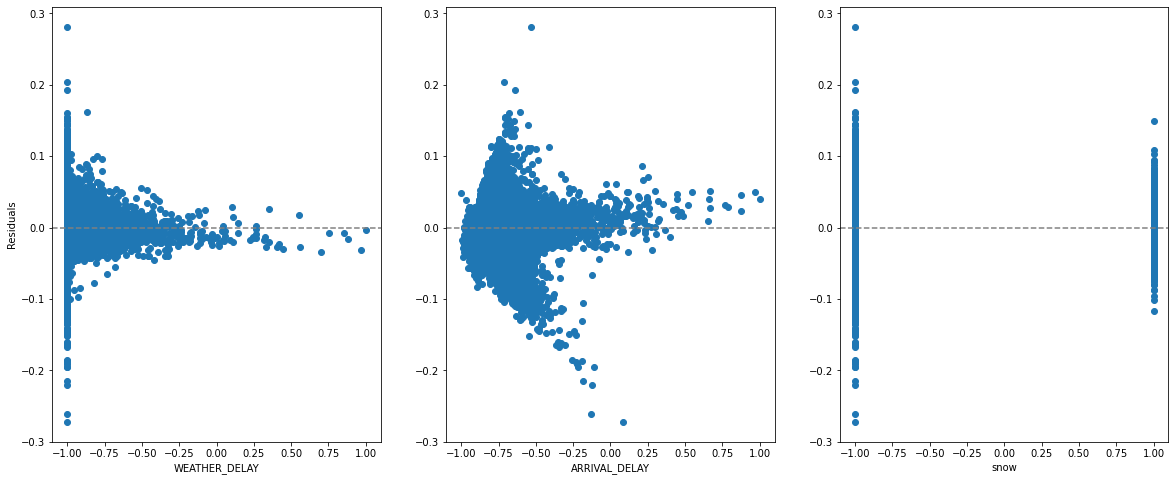

In [ ]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(131)
ax1.plot(scaled_df.WEATHER_DELAY, scaled_df.DEPARTURE_DELAY_residuals, 'o')
ax1.axhline(y = 0, linestyle = '--', color = 'grey')
ax1.set_xlabel('WEATHER_DELAY')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(132)
ax2.plot(scaled_df.ARRIVAL_DELAY, scaled_df.DEPARTURE_DELAY_residuals, 'o')
ax2.axhline(y = 0, linestyle = '--', color = 'grey')
ax2.set_xlabel('ARRIVAL_DELAY')

ax1 = fig.add_subplot(133)
ax1.plot(scaled_df.snow, scaled_df.DEPARTURE_DELAY_residuals, 'o')
ax1.axhline(y = 0, linestyle = '--', color = 'grey')
ax1.set_xlabel('snow')

plt.show()

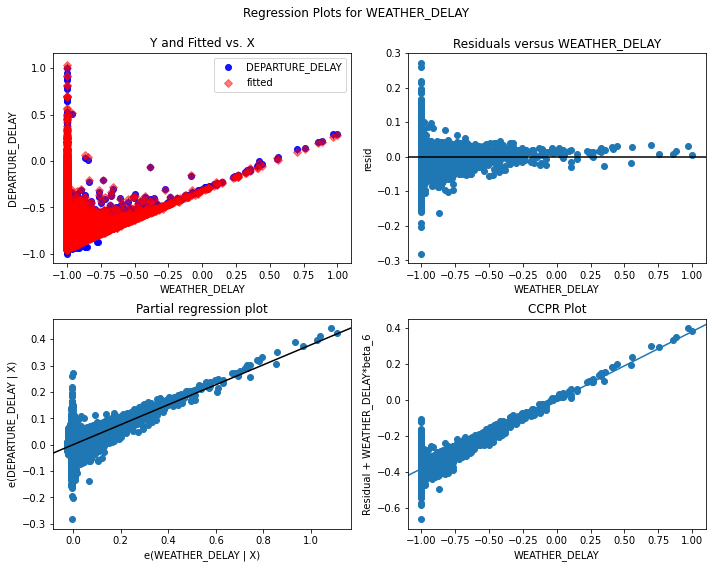

In [ ]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results2, "WEATHER_DELAY", fig = fig)

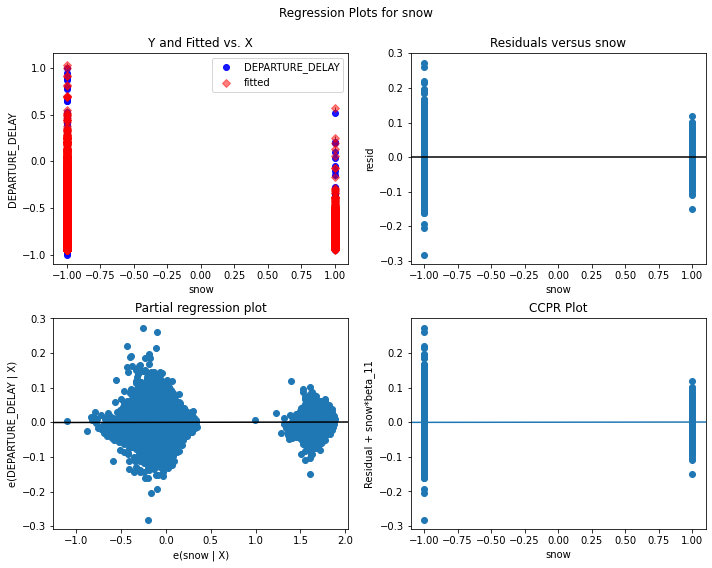

In [ ]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results2, "snow", fig = fig)

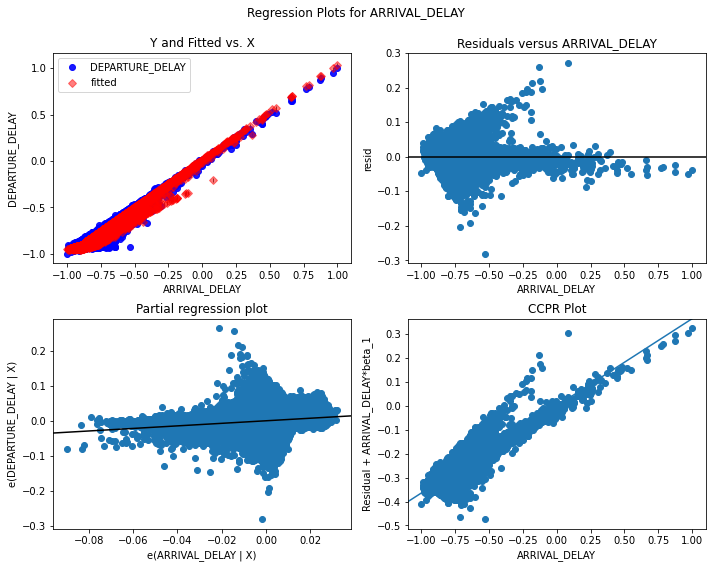

In [ ]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results2, "ARRIVAL_DELAY", fig = fig)

In [ ]:
#fig, ax = plt.subplots(figsize=(30,20))
#fig = plot_leverage_resid2(results2, ax=ax)

In [ ]:
# output to csv
df2.to_csv('part2_output.csv', index=False)

!cp part2_output.csv "drive/MyDrive/UWaterloo Stats Course Group 2 Winter 2021/part2_output.csv"